# Preprocessing images and video
This notebook demonstrates the results of preprocessing for various devices on using images and video from the [CIRS 040GSE](https://www.cirsinc.com/products/ultrasound/zerdine-hydrogel/multi-purpose-multi-tisse-ultrasound-phantom/) phantom.

## Butterfly
Below shows results for the Butterfly iQ (note, there's a new Butterfly iQ+).  Note, the orientation mark is still visible in the output image as it is too large to median filter.  Possible solutions are a more advanced in-filling procedure than the median filter used or cropping the image.

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1928, 1080]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.047619, 0.047619]), 
	size: itkSize2 ([693, 994]), 
	min/max value: 0.0, 1.0, 
	meta: {'spacing': array([0.04761905, 0.04761905]), 'crop': array([[  54, 1048],
       [ 614, 1307]])}


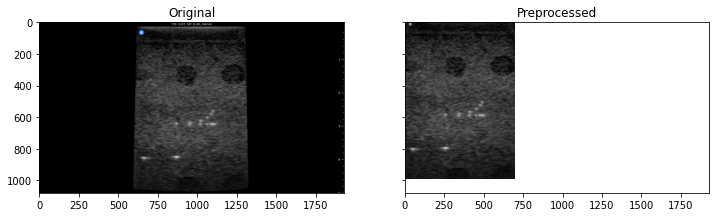

In [1]:
import itk
import matplotlib.pyplot as plt
import itkpocus.butterfly as butterfly
import numpy as np

fp = '../tests/data/butterfly_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = butterfly.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Clarius

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1280, 960]), 
	min/max RGB value: 0, 247
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.714286, 0.714286]), 
	size: itkSize2 ([592, 642]), 
	min/max value: 0.0, 0.9686274528503418, 
	meta: {'spacing': [0.7142857142857143, 0.7142857142857143], 'crop': array([[159, 800],
       [344, 935]], dtype=int64)}


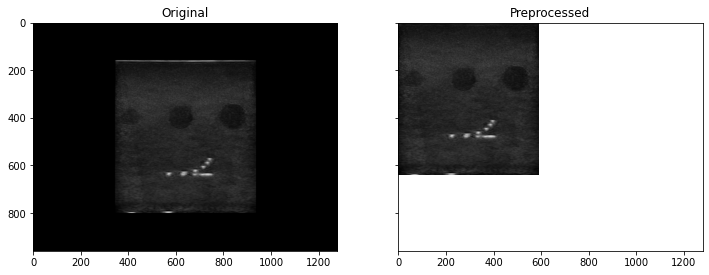

In [2]:
import itk
import matplotlib.pyplot as plt
import itkpocus.clarius as clarius
import numpy as np

fp = '../tests/data/clarius_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = clarius.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Sonoque

Unknown encoding 'ISO_IR' - using default encoding instead


orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC3'>, 
	spacing: itkVectorD3 ([1, 1, 1]), 
	size: itkSize3 ([2083, 1455, 1]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageD2'>, 
	spacing: itkVectorD2 ([0.00291, 0.00291]), 
	size: itkSize2 ([1293, 1311]), 
	min/max value: 0.0, 0.9607843137254902, 
	meta: {'spacing': (0.00291, 0.00291), 'crop': array([[  72, 1382],
       [ 395, 1687]], dtype=int64)}


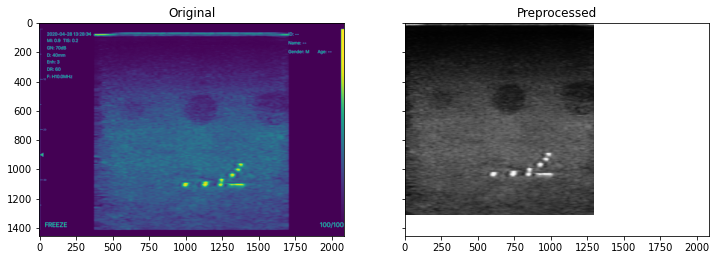

In [3]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import numpy as np

fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
new_img, meta = sonoque.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Interson
Coming Soon!

## Sonivate
Sonivate currently doesn't allow direct retrieval of ultrasound images from its device.  We recommend streaming the probe to Slicer and then saving from Slicer.

(1455, 2083),npimg.GetLargestPossibleRegion().GetSize()
crop=[[  72 1382]
 [ 395 1687]]
orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC3'>, 
	spacing: itkVectorD3 ([1, 1, 1]), 
	size: itkSize3 ([2083, 1455, 1]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1293, 1311]), 
	min/max value: 2, 244, 
	meta: 


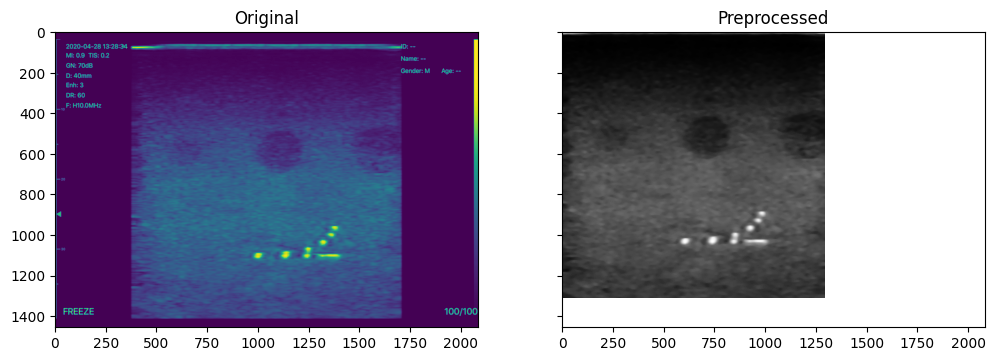

In [40]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import itkpocus.util
import numpy as np

def sonoque_load_and_preprocess_image(origimg):
    npimg_rgb = itk.image_duplicator(orig_img[0,:,:,:])
    npimg = npimg_rgb[:,:,0]
    
    print(f"{npimg.shape},npimg.GetLargestPossibleRegion().GetSize()")
    crop = sonoque._find_crop(npimg)
    print(f"crop={crop}")
    c1=itkpocus.util.crop(npimg, crop)
    c3=itkpocus.util.crop(npimg_rgb, crop, rgb=True)
    npnorm, _ = sonoque._normalize(c1,c3)
    
    img = itk.image_from_array(npnorm)
    return img, ""

fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
clonedImage = itk.image_duplicator(orig_img[0,:,:,:])
new_img, meta = sonoque_load_and_preprocess_image(orig_img)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([720, 540]), 
	min/max RGB value: 0, 255
(540, 720),npimg.GetLargestPossibleRegion().GetSize()
stuff_cols(720,)=[False  True  True  True  True  True  True  True  True  True]
zerocol : (64, 1)
crop=[[ 95 448]
 [136 583]]
new_img: 
	type: <class 'itk.itkImagePython.itkImageUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([448, 354]), 
	min/max value: 0, 242, 
	meta: 


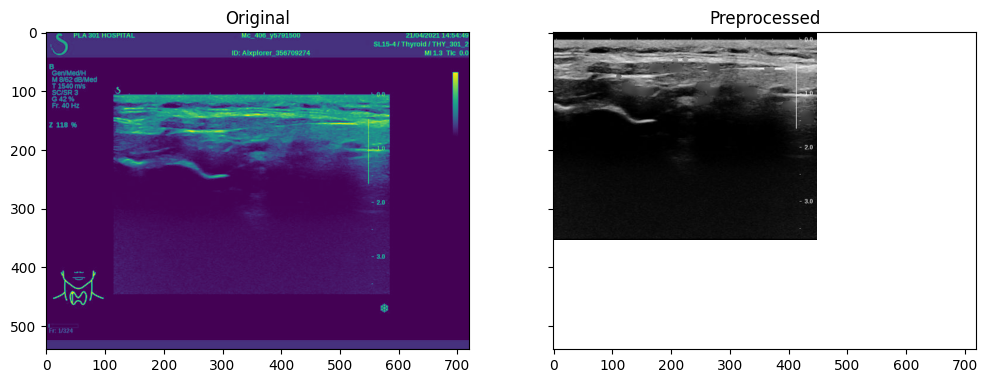

In [55]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import itkpocus.util
import numpy as np

def sonoque_find_crop(npimg):
    '''
    Calculates a crop that contains only the ultrasound portion of the image (overlay text may still be on portion).
    
    Parameters
    ----------
    npimg : ndarray
        single channel 0 to 255 (e.g. pydicom's pixel_array or a video frame)
    
    Returns
    -------
    crop : ndarray
        (2x2 ndarray) [[topbound, bottombound], [leftbound, rightbound]]
    '''
    nonempty_threshold = 0.1 # percentage of nonzero pixels
    background_threshold = 30 # pixel intensity
    stuff_cols = np.sum(npimg > background_threshold, axis=0) > nonempty_threshold * npimg.shape[0]
    print(f"stuff_cols{stuff_cols.shape}={stuff_cols[:10]}")
    
    height_min_crop = 0.05
    width_min_crop = 0.19 # currently unused
    
    
    midcol = npimg.shape[1]/2.0 # not worried if non-integer
    zerocol = np.argwhere(stuff_cols == 0)
    print(f"zerocol : {zerocol.shape}")
    if zerocol.shape[0]<1:
        return np.array([[0, -1], [0, -1]])
    leftbound = np.max( (np.max(zerocol[zerocol < midcol])+1, int(npimg.shape[1] * width_min_crop) ))
    rightbound = np.min( (np.min(zerocol[midcol < zerocol])-1, int(npimg.shape[1] * (1 - width_min_crop) )))
    
    midrow = npimg.shape[0]/2.0
    rowsum = np.sum(npimg[:,leftbound:rightbound+1], axis=1)
    zerorow = np.argwhere(rowsum == 0)
    topbound = np.max( (np.max(zerorow[zerorow < midrow]), int(height_min_crop * npimg.shape[0])) )
    bottombound = np.min( (np.min(zerorow[midrow < zerorow]), int(npimg.shape[0] * (1 - height_min_crop))) )
    
    return np.array([[topbound, bottombound], [leftbound, rightbound]])

def sonoque_load_and_preprocess_image(origimg):
    npimg_rgb = itk.image_duplicator(orig_img[:,:,:])
    npimg = npimg_rgb[:,:,0]
    print(f"{npimg.shape},npimg.GetLargestPossibleRegion().GetSize()")
    crop = sonoque_find_crop(npimg)
    print(f"crop={crop}")
    c1=itkpocus.util.crop(npimg, crop)
    c3=itkpocus.util.crop(npimg_rgb, crop, rgb=True)
    npnorm, _ = sonoque._normalize(c1,c3)
    
    img = itk.image_from_array(npnorm)
    return img, ""

fp = '/media/eton/hdd931g/42-workspace4debian/10-ExtSrcs/ITKPOCUS/itkpocus/tests/data/83CasesFirstImg/thyroidNodules_axp-043_frm-0001.png'
orig_img = itk.imread(fp)

print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

new_img, meta = sonoque_load_and_preprocess_image(orig_img)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')


print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

type of itk-image:<class 'itk.itkImagePython.itkImageRGBUC3'>


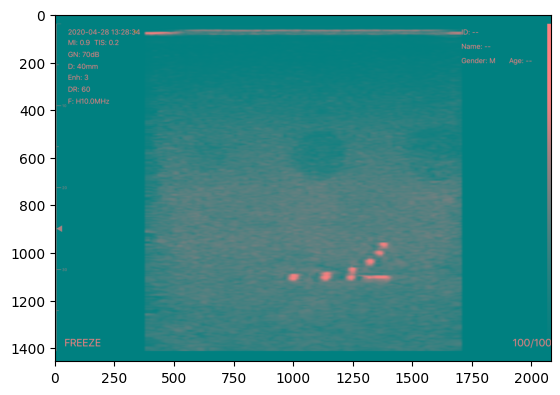

In [25]:
import copy
fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
print(f"type of itk-image:{type(orig_img)}")
clonedImage = itk.image_duplicator(orig_img[0,:,:,:]) #this work
#clonedImage = itk.image_duplicator(orig_img)


def deepcopyItkImg(original_image):
    # Determine the pixel type and dimensionality from the original image
    imginfo=itk.template(original_image)
    print(f"{type(imginfo)}, {type(imginfo[1])},{type(imginfo[1][0])}, {imginfo[1][0]}")
    pixel_type = imginfo[1][0]
    dimension = original_image.GetImageDimension()
    
    # Create a new image of the same type
    image_type = itk.Image[pixel_type, dimension]
    new_image = image_type.New()
    
    # Set the same region and allocate memory
    new_image.SetRegions(original_image.GetLargestPossibleRegion())
    new_image.Allocate()
    
    # Optionally, copy the data from the original image to the new image
    itk.imath.copy_image(original_image, new_image)

    return new_image

#clonedImage = deepcopyItkImg(orig_img)
plt.imshow(clonedImage)


In [8]:
import itk

Dimension = 2
PixelType = itk.UC

ImageType = itk.Image[PixelType, Dimension] ##itk::Image<PixelType, Dimension>;

randomImageSource = itk.RandomImageSource[ImageType].New()
randomImageSource.SetNumberOfWorkUnits(1)  # to produce non-random results

image = randomImageSource.GetOutput()

clonedImage = itk.image_duplicator(image)

In [3]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import numpy as np

fp='/home/eton/42workspace.lnk/30-downloads/241209-dateBefroreMe/5_5_6.dcm'
orig_img = itk.imread(fp)
new_img, meta = sonoque.load_and_preprocess_image(fp)




KeyError: (0018,6011)

In [2]:
!pip install matplotlib


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.1 MB/s eta 0:00:000:00:01
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.4 MB/s eta 0:00:0031m103.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s eta 0:00:00118.5 MB/s eta 0:00:01
